<a href="https://colab.research.google.com/github/ali-kin4/MachineLearning/blob/main/OOP_ML_%2B_Multi_Thread_v2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import time
import threading
sns.set()

In [ ]:
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
from tqdm import tqdm_notebook as tqdm
with tqdm(range(1)) as pbar:
  pass

# Class for parameters' initiation
**MLStarter**

In [3]:
class MLStarter:
  def __init__(self, df, seed, model_name):
    self.df = df
    self.seed = seed
    self.model_name = model_name
    X_unscale, X, y, X_train, X_test, y_train, y_test, y_pred, model = 0, 0, 0, 0, 0, 0, 0, 0, 0
    self.X_unscale = X_unscale
    self.X = X
    self.y = y
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test
    self.y_pred = y_pred
    self.model = model

# Class for PreProcessing
**Child of MLStarter**

In [4]:
class preprocessor(MLStarter):
  def __init__(self, df, seed, model_name):
    super().__init__(df, seed, model_name)

  def null_checker(self):
    return (df.isnull().sum())
  
  def separator(self):
    self.X = df.iloc[:, :-1]
    self.y = df.iloc[:,-1]
    self.X_unscale = self.X

  def data_encoder(self):
    encoder = LabelEncoder()
    self.y = encoder.fit_transform(self.y)

  def null_imputer(self):
    if (sum(self.null_checker()) != 0):
      cols = []
      for col in self.X.columns: 
          cols.append(col) 

      imputer = KNNImputer(n_neighbors=2)
      X_filled = imputer.fit_transform(self.X)
      X_new = pd.DataFrame(data=X_filled, columns=cols)
      self.X = X_new

  def data_scaler(self):
    scaler = MinMaxScaler()
    scaler.fit(self.X)
    self.X = scaler.transform(self.X)
    # self.X_unscale = scaler.inverse_transform(self.X)

  def data_splitter(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=self.seed)

  def metrics_calc(self):
    print(classification_report(self.y_test, self.y_pred))
    print("="*30)
    print("Accuracy: {}".format(accuracy_score(self.y_test, self.y_pred)))

# Class of ML classifier
**Child of preprocessor**

In [14]:
class classifier(preprocessor):
  def __init__(self, df, seed, model_name):
    super().__init__(df, seed, model_name)

  def SVM(self):
    print("SVM")
    svc = SVC(probability=True)  # Default hyperparameters -- put probability=True if you want to plot ROC Curve
    svc.fit(self.X_train, self.y_train)
    y_pred = svc.predict(self.X_test)
    self.y_pred = y_pred
    self.model = svc
    self.metrics_calc() #calculate metrics

  def logreg(self):
    print("LogReg")
    model = LogisticRegression(max_iter=1000)
    model.fit(self.X_train, self.y_train)
    y_pred = model.predict(self.X_test)
    self.y_pred = y_pred
    self.model = model
    self.metrics_calc()

  def NB(self):
    print("Naive Bayes")
    NB = GaussianNB()
    NB.fit(self.X_train, self.y_train)
    y_pred = NB.predict(self.X_test)
    self.y_pred = y_pred
    self.model = NB
    self.metrics_calc()

  def DT(self):
    print("Decision Tree")
    DT = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
    DT.fit(self.X_train, self.y_train)
    y_pred = DT.predict(self.X_test)
    self.y_pred = y_pred
    self.model = DT
    self.metrics_calc()
  
  def KNN(self):
    print("K Nearest Neighbors (KNN)")
    KNN = KNeighborsClassifier(n_neighbors = 5)
    KNN.fit(self.X_train, self.y_train)
    y_pred = KNN.predict(self.X_test)
    self.y_pred = y_pred
    self.model = KNN
    self.metrics_calc()

  def NN(self):
    print("Neural Networks")
    NN = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1500, activation = 'relu', solver='adam', random_state=42, verbose = False)
    NN.fit(self.X_train, self.y_train)
    y_pred = NN.predict(self.X_test)
    self.y_pred = y_pred
    self.model = NN
    self.metrics_calc()

  def RF(self):
    print("Random Forest")
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(self.X_train, self.y_train)
    y_pred = clf.predict(self.X_test)
    self.y_pred = y_pred
    self.model = clf
    self.metrics_calc()

# Class of postprocessor
**Child of classifier**

In [15]:
class postprocessor(classifier):
  def __init__(self, df, seed, model_name):
    super().__init__(df, seed, model_name)
  
  def roc_plotter(self):
    y_pred_proba = self.model.predict_proba(self.X_test)
    fpr0, tpr0, _ = roc_curve(self.y_test, y_pred_proba[:, 0], pos_label=self.model.classes_[0]) #class 0
    fpr1, tpr1, _ = roc_curve(self.y_test, y_pred_proba[:, 1], pos_label=self.model.classes_[1]) #class 1
    
    AUC0 = auc(fpr0, tpr0)
    AUC1 = auc(fpr1, tpr1)
    print("AUC score: class 0: {} | class 1: {}".format(AUC0, AUC1))

    plt.figure(figsize = (8, 8))
    plt.xlabel("FP Rate")
    plt.ylabel("TP Rate")
    plt.plot(fpr0, tpr0, label = 'class 0', linewidth = 2)
    plt.plot(fpr1, tpr1, label = 'class 1', linewidth = 2)
    plt.title("ROC Curve")
    plt.legend()
    plt.autoscale(enable=True, axis='both', tight=False)
    plt.show()

  def conf_matrix(self):
    cnf_matrix = confusion_matrix(self.y_test, self.y_pred)

    fig, ax = plt.subplots(figsize=(7, 7))
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title("Confusion matrix", y=1.1)
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label");

In [16]:
class autolearner(postprocessor):
  def __init__(self, df, seed, model_name):
    super().__init__(df, seed, model_name)
  
  def model_selector(self):
    if self.model_name == "SVM":
      self.SVM()
    elif self.model_name == "LogReg":
      self.logreg()
    elif self.model_name == "NB":
      self.NB()
    elif self.model_name == "DT":
      self.DT()
    elif self.model_name == "KNN":
      self.KNN()
    elif self.model_name == "NN":
      self.NN()
    elif self.model_name == "RF":
      self.RF()

  def auto_learn(self):
    self.null_checker()
    self.separator()
    self.data_encoder()
    self.null_imputer()
    self.data_scaler()
    self.data_splitter()
    self.model_selector()

In [19]:
file_name = '/content/voice.csv'
df = pd.read_csv(file_name)
seed = 8
# model_name = 'NN'
model_names = ['SVM', 'LogReg', 'NB', 'DT', 'KNN', 'NN', 'RF']

vmodel0 = autolearner(df, seed, model_names[0])
vmodel1 = autolearner(df, seed, model_names[1])
vmodel2 = autolearner(df, seed, model_names[2])
vmodel3 = autolearner(df, seed, model_names[3])
vmodel4 = autolearner(df, seed, model_names[4])
vmodel5 = autolearner(df, seed, model_names[5])
vmodel6 = autolearner(df, seed, model_names[6])

In [22]:
t0 = threading.Thread(target = vmodel0.auto_learn())
t1 = threading.Thread(target = vmodel1.auto_learn())
t2 = threading.Thread(target = vmodel2.auto_learn())
t3 = threading.Thread(target = vmodel3.auto_learn())
t4 = threading.Thread(target = vmodel4.auto_learn())
t5 = threading.Thread(target = vmodel5.auto_learn())
t6 = threading.Thread(target = vmodel6.auto_learn())

t0.start()
t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()

t0.join()
t1.join()
t2.join()
t3.join()
t4.join()
t5.join()
t6.join()

print("Done!")

SVM
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       325
           1       0.98      0.98      0.98       309

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Accuracy: 0.9810725552050473
LogReg
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       325
           1       0.96      0.98      0.97       309

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Accuracy: 0.973186119873817
Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       325
           1       0.88      0.92      0.90       309

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90     

AUC score: class 0: 0.9965247697286532 | class 1: 0.9965247697286532


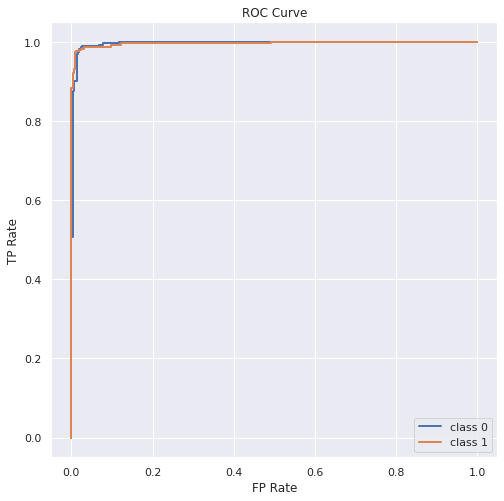

In [25]:
vmodel0.roc_plotter()